# Stroke Dataset

In this dataset various features of more than 5000 people are reported. 
Our goal in this work is to analyze these features and their influence on the stroke.

# Importing the required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
sns.set(font_scale = 1.5, palette = 'bright')

# Reading the dataset

In [3]:
df = pd.read_csv("Stroke_dataset.csv", index_col = "id")

In [4]:
df = df.convert_dtypes()

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,<NA>,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# A rough analyzation on the categorical columns


In [6]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: Int64

In [7]:
df[df.gender == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


### Since the person with gender of Other does not have Stroke it has no significant influence on the dataset to omit it. Therefore, this row of dataset is deleted:

In [8]:
df.drop(index = 56156, inplace = True)

In [9]:
# This function barplots the categorical columns of the dataset

def bar_plot(Series):
    plt.figure(figsize = [15,5])
    splot = sns.barplot(x = Series.index, y = Series)
    plt.ylim(0, Series.max()*1.1)
    for p in splot.patches:
        h = p.get_height()
        w = p.get_width()
        x = p.get_x()
        splot.annotate("{0:.0f}  ({1:.2%})".format(h,h/Series.sum()),(x+w/2.0, h),ha = 'center', va = 'center',
                      xytext = (0,10), textcoords = 'offset points')

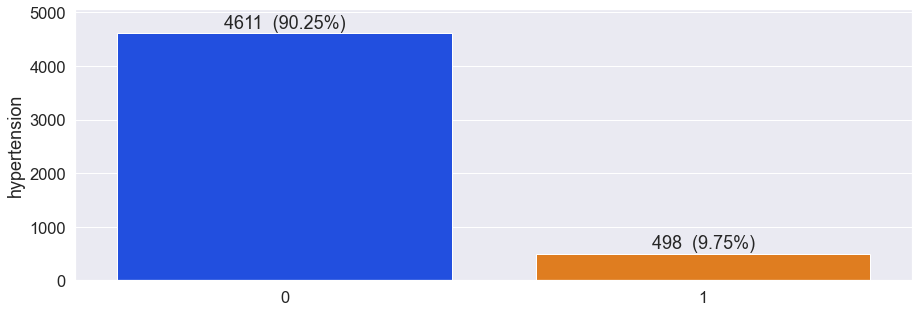

In [10]:
bar_plot(df.hypertension.value_counts())

Text(0.5, 1.0, 'The Gender of people in this dataset')

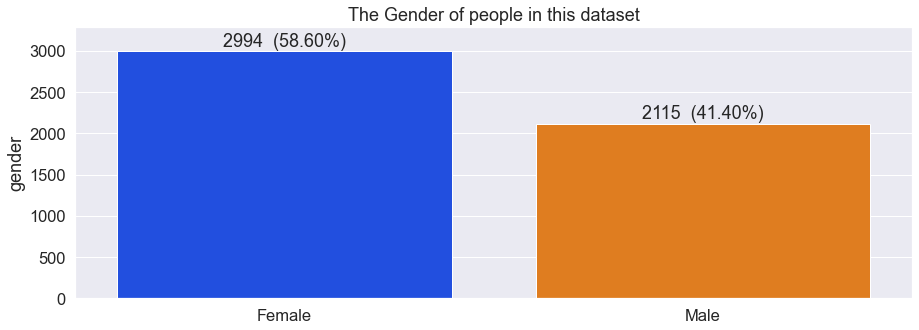

In [11]:
bar_plot(df.gender.value_counts())
plt.title("The Gender of people in this dataset", fontsize = 18)

Text(0.5, 1.0, 'People who had (1) or had not (0) hypertension')

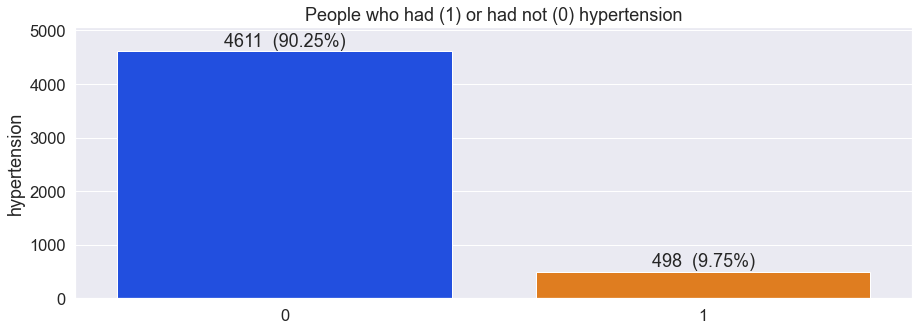

In [12]:
bar_plot(df.hypertension.value_counts())
plt.title("People who had (1) or had not (0) hypertension", fontsize = 18)

Text(0.5, 1.0, 'People who had (1) or had not (0) heart disease')

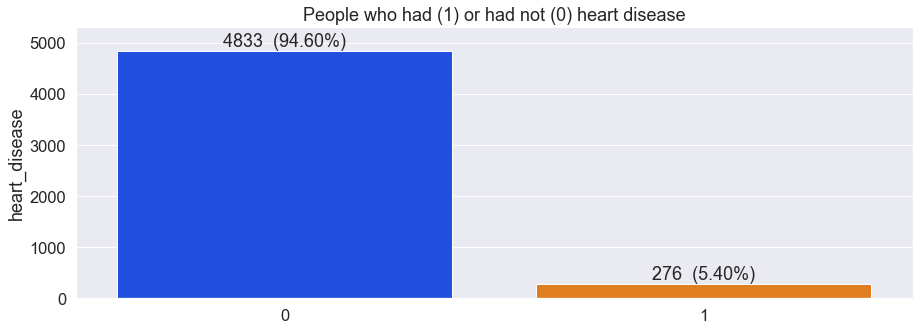

In [13]:
bar_plot(df.heart_disease.value_counts())
plt.title("People who had (1) or had not (0) heart disease", fontsize = 18)

Text(0.5, 1.0, 'People who has (Yes) or has not (No) married')

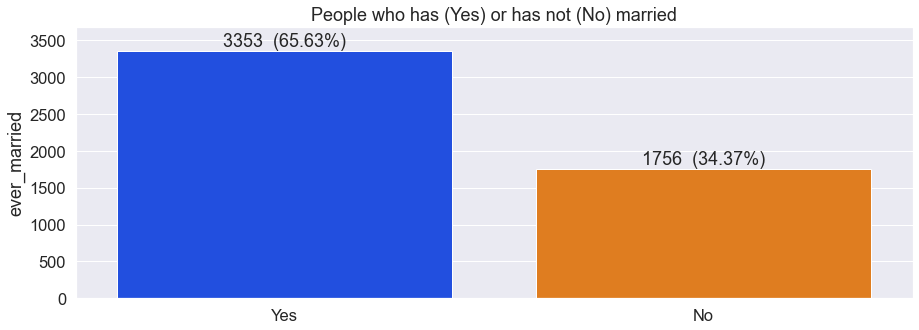

In [14]:
bar_plot(df.ever_married.value_counts())
plt.title("People who has (Yes) or has not (No) married", fontsize = 18)

Text(0.5, 1.0, 'Different types of work the people in this dataset have.')

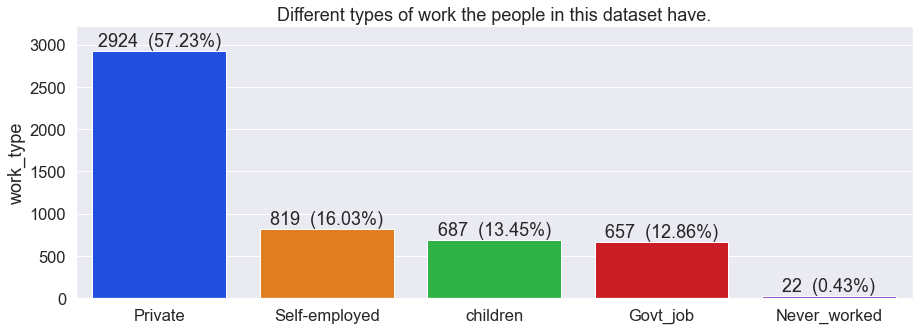

In [15]:
bar_plot(df.work_type.value_counts())
plt.title("Different types of work the people in this dataset have.", fontsize = 18)

Text(0.5, 1.0, 'People who live in Urban or Rural areas')

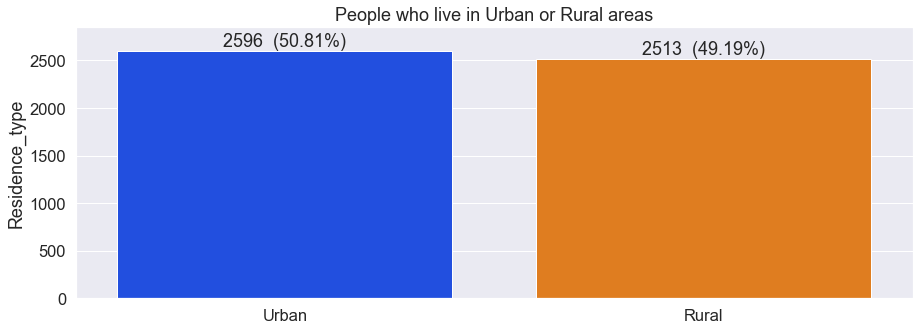

In [16]:
bar_plot(df.Residence_type.value_counts())
plt.title("People who live in Urban or Rural areas", fontsize = 18)

Text(0.5, 1.0, 'Different status of smoking for the people in this dataset')

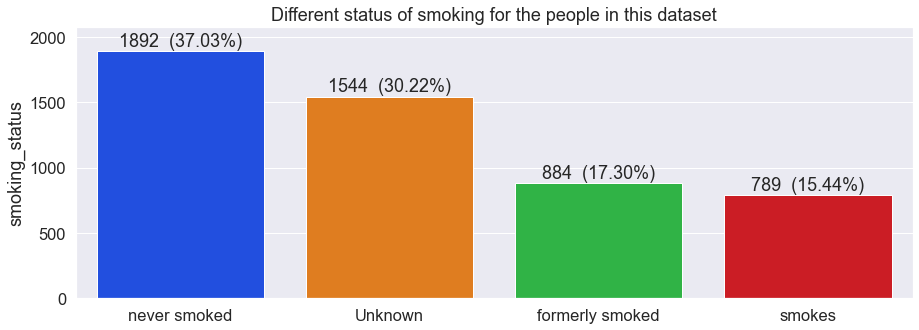

In [17]:
bar_plot(df.smoking_status.value_counts())
plt.title("Different status of smoking for the people in this dataset", fontsize = 18)

Text(0.5, 1.0, 'People who had (1) or had not (0) stroke')

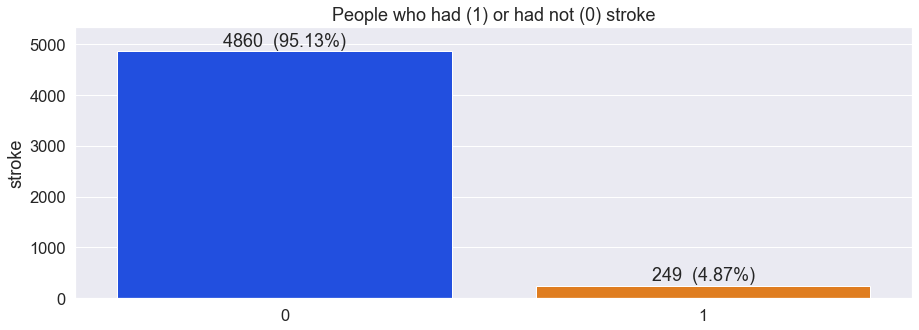

In [18]:
bar_plot(df.stroke.value_counts())
plt.title("People who had (1) or had not (0) stroke", fontsize = 18)

# A rough analyzation on the float columns

In [19]:
df.bmi.dropna().count()

4908

Text(0.5, 1.0, 'bmi')

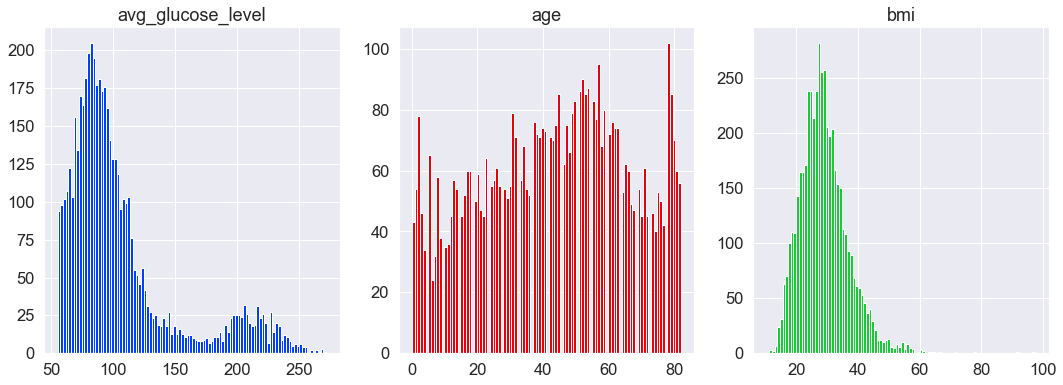

In [20]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows = 1, ncols = 3, figsize = [18,6])
ax1.hist(df.avg_glucose_level, bins = 100,color = "b")
ax1.set_title("avg_glucose_level")
ax2.hist(df.age, bins = 100,color = "r")
ax2.set_title("age")
ax3.hist(df.bmi.dropna(), bins = 100,color = "g")
ax3.set_title("bmi")

# Inputting categorical features into the dataset to investigate the correlation of them with stroke

In [21]:
mapper = {"Male" : 0, "Female" : 1}
df["gender_digit"] = df.gender.map(mapper)

In [22]:
mapper = {"No" : 0, "Yes" : 1}
df["ever_married_digit"] = df.ever_married.map(mapper)

In [23]:
mapper = {"Urban" : 0, "Rural" : 1}
df["Residence_type_digit"] = df.Residence_type.map(mapper)

# A General analyzation of the dataset

<AxesSubplot:>

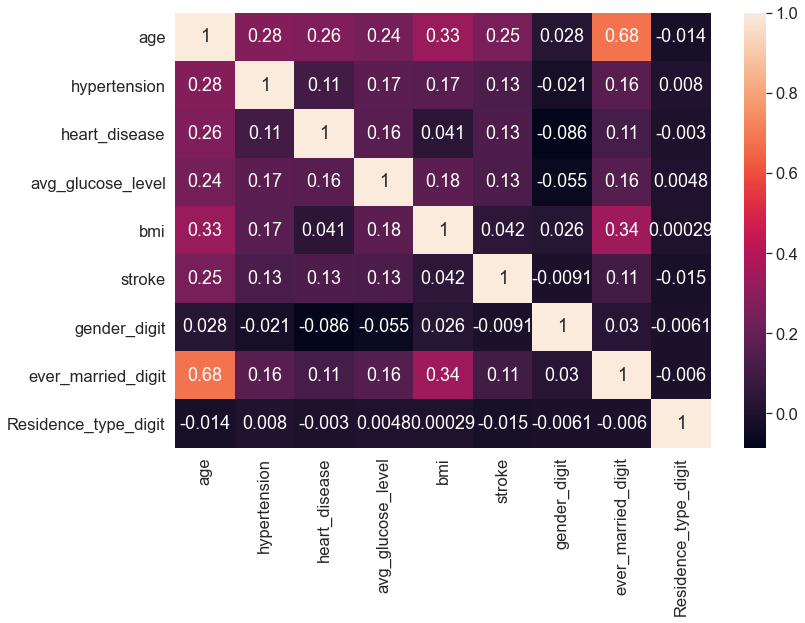

In [24]:
plt.figure(figsize = [12,8])
sns.heatmap(df.corr(), annot=True)

### According to the figure above, the most related features to stroke are average glucose level (0.13), heat disease (0.13), hypertension (0.13) and age (0.25). Therefore these features are very important in analyzing the dataset.
### On the other side, the most influential features on  bmi are marital status (0.34), age (0.33), average glucose level (0.18), hypertension (0.17).

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 9046 to 44679
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                5109 non-null   string 
 1   age                   5109 non-null   Float64
 2   hypertension          5109 non-null   Int64  
 3   heart_disease         5109 non-null   Int64  
 4   ever_married          5109 non-null   string 
 5   work_type             5109 non-null   string 
 6   Residence_type        5109 non-null   string 
 7   avg_glucose_level     5109 non-null   Float64
 8   bmi                   4908 non-null   Float64
 9   smoking_status        5109 non-null   string 
 10  stroke                5109 non-null   Int64  
 11  gender_digit          5109 non-null   int64  
 12  ever_married_digit    5109 non-null   int64  
 13  Residence_type_digit  5109 non-null   int64  
dtypes: Float64(3), Int64(3), int64(3), string(5)
memory usage: 628.6 KB


### As can be seen, there are 201 missing values for bmi feature.

In [26]:
df[df.bmi.isna()].groupby("stroke").age.count()

stroke
0    161
1     40
Name: age, dtype: int64

### Among these 201 people 40 of them had stroke. Therefore, it is not a rational idea to omit these NA values completely. Thus, we are going to interpolate the values of bmi for each of these observations with respect to other features which are the most influential on bmi.

In [27]:
df.describe(percentiles=[0,0.05,0.5,0.95,1])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_digit,ever_married_digit,Residence_type_digit
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738,0.586025,0.656293,0.491877
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340,0.492592,0.474991,0.499983
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000,0.000000,0.000000
0%,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000,0.000000,0.000000
5%,5.000000,0.000000,0.000000,60.712000,17.63500,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000,1.000000,1.000000,0.000000
95%,79.000000,1.000000,1.000000,216.304000,42.96500,0.000000,1.000000,1.000000,1.000000
100%,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000,1.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000,1.000000,1.000000,1.000000


### As can be seen only 10% of the observations have bmi either below 17 or above 43. Therefore, instead of extreme maximum and minimum (97 and 10), we are going to use (43 and 17). The most influential features are marital status (0.34), age (0.33), average glucose level (0.18), hypertension (0.17). by using the weighted sum of these data when they are normalized, we can have a logical estimate of missing bmi values. the weights are the corresponding correlation coefficients.

In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_digit,ever_married_digit,Residence_type_digit
id,,,,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,<NA>,never smoked,1,1,1,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1,0
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1,1


In [29]:
min_max_scaler = MinMaxScaler()

# First the features which are not between 0 and 1 are normalized
x1 = df[['age']].values.astype(float)
x2 = df[['avg_glucose_level']].values.astype(float)

# Normalized features
age_scaled = min_max_scaler.fit_transform(x1).reshape(-1)
glu_scaled = min_max_scaler.fit_transform(x2).reshape(-1)
mar_scaled = np.array(df.ever_married_digit.array)
hyp_scaled = np.array(df.hypertension.array)

# Coefficients
C_age = df.bmi.corr(df.avg_glucose_level, method = "spearman")
C_glu = df.bmi.corr(df.avg_glucose_level, method = "spearman")
C_mar = df.bmi.corr(df.ever_married_digit, method = "spearman")
C_hyp = df.bmi.corr(df.hypertension.astype(float), method = "spearman")

coef = (age_scaled*C_age + glu_scaled*C_glu + mar_scaled*C_mar + hyp_scaled*C_hyp)/(C_age+C_glu+C_mar+C_hyp)
#A = glucose_scaled*df.bmi.corr(df.avg_glucose_level)+age_scaled*df.bmi.corr(df.age)+df.bmi.corr(df.hypertension.astype(float))+df.bmi.corr(df.ever_married_digit)
#B = df.bmi.corr(df.avg_glucose_level)+df.bmi.corr(df.age)+df.bmi.corr(df.hypertension.astype(float))+df.bmi.corr(df.ever_married_digit)
#C = A/B
#coef = pd.Series(C[:-1])
filling_bmi = 17+coef*(43-17)
print("The maximum and minimum bmi are {0:.2f} and {1:.2f}".format(filling_bmi.max(), filling_bmi.min()))

The maximum and minimum bmi are 42.65 and 17.02


In [30]:
df.loc[df.bmi.isna(),"bmi"] = np.nan
df["interpolated_bmi"] = filling_bmi
df.interpolated_bmi = df.interpolated_bmi.astype(float)
df.loc[df.bmi.isna(),"bmi"] = df.interpolated_bmi

In [31]:
df[["bmi","interpolated_bmi"]].corr()

,bmi,interpolated_bmi
bmi,1.000000,0.402809
interpolated_bmi,0.402809,1.000000


# Smoking status, gender and age

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 9046 to 44679
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                5109 non-null   string 
 1   age                   5109 non-null   Float64
 2   hypertension          5109 non-null   Int64  
 3   heart_disease         5109 non-null   Int64  
 4   ever_married          5109 non-null   string 
 5   work_type             5109 non-null   string 
 6   Residence_type        5109 non-null   string 
 7   avg_glucose_level     5109 non-null   Float64
 8   bmi                   5109 non-null   Float64
 9   smoking_status        5109 non-null   string 
 10  stroke                5109 non-null   Int64  
 11  gender_digit          5109 non-null   int64  
 12  ever_married_digit    5109 non-null   int64  
 13  Residence_type_digit  5109 non-null   int64  
 14  interpolated_bmi      5109 non-null   float64
dtypes: Float64(3), In

<AxesSubplot:xlabel='gender', ylabel='age'>

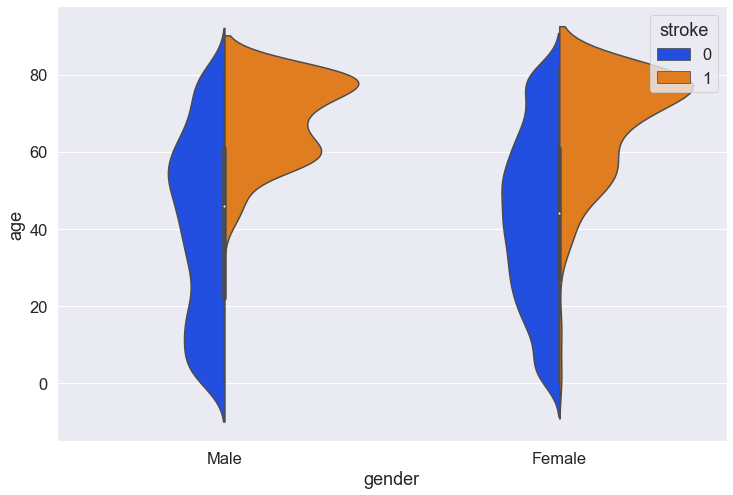

In [33]:
plt.figure(figsize = [12,8])
sns.violinplot(data = df, y = df.age.astype('float'), x = "gender", hue = "stroke",dodge = True, split = True)

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


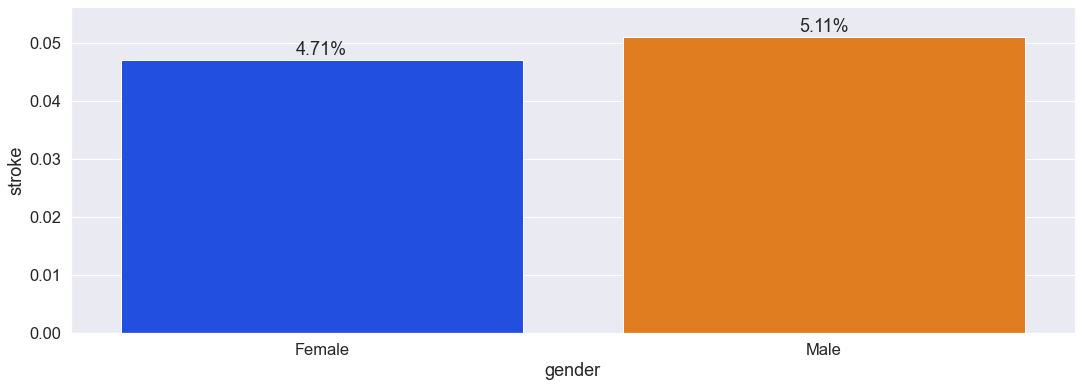

In [34]:
S1 = df.groupby("gender").stroke.sum()/df.groupby("gender").stroke.count()

def bar_plot_rel(Series):
    
    plt.figure(figsize = [18,6])
    splot = sns.barplot(S1.index, S1)
    plt.ylim(0, S1.max()*1.1)
    for p in splot.patches:
        h = p.get_height()
        w = p.get_width()
        x = p.get_x()
        splot.annotate("{0:.2%}".format(h),
                      (x+w/2.0,h),ha = 'center', va = 'center',xytext = (0,10), textcoords = 'offset points')
        
bar_plot_rel(S1)

### As is shown in the above two figures, the stroke rates among men and women are 4.7% and 5.1%, respectively. In both groups the highest risk of encounterring stroke is related to ages more than 60.

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


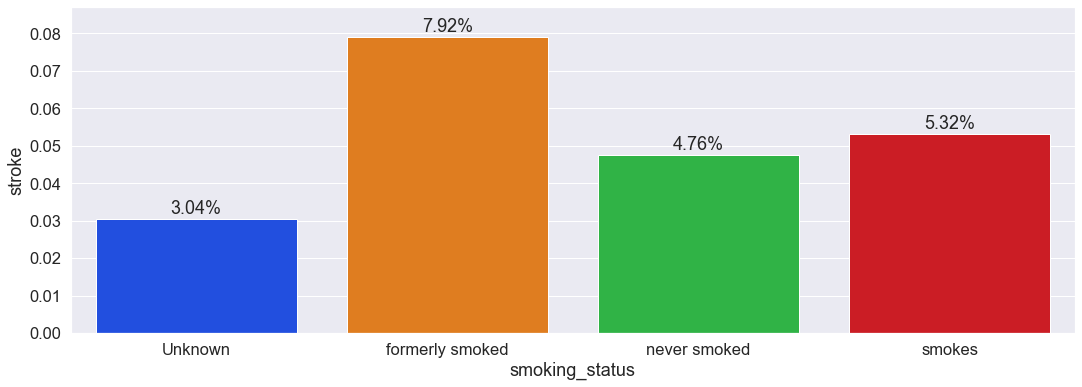

In [35]:
S1 = df.groupby("smoking_status").stroke.sum()/df.groupby("smoking_status").stroke.count()
bar_plot_rel(S1)

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

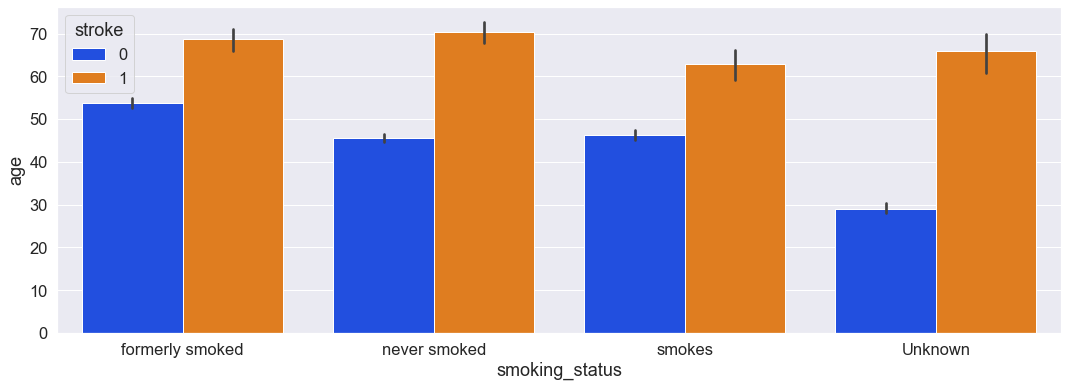

In [36]:
plt.figure(figsize = [18,6])
sns.barplot(data = df, y = "age", x = "smoking_status", hue = "stroke",
             dodge = True)

### As can be seen in the figure above, only 5% and 8% of the people who smoke or have smoked formerly encountered stroke. This amount for the people who have not smoked is nearly 5%. Therefore, It can be concluded that smoking has very little influence on the stroke.

Text(0, 0.5, 'Mean Age')

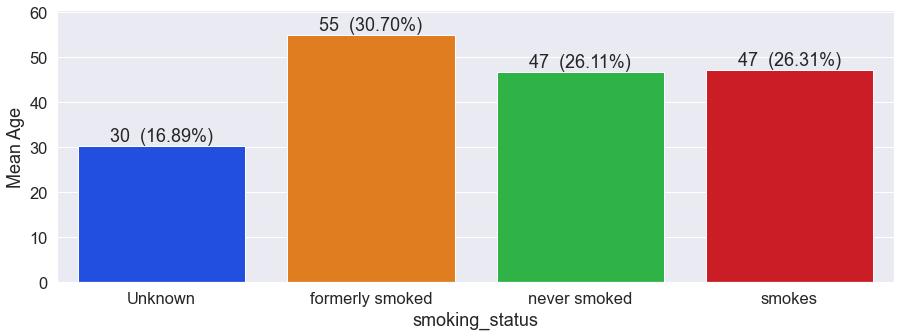

In [37]:
bar_plot(df.groupby("smoking_status").age.mean())
plt.ylabel("Mean Age")

### According to the figure above, the average age of the people who formerly smoked is 55 and the average age of the people who smoke or have never smoked is 47. This is why the stroke rate in the first category is higher than the other categories.

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

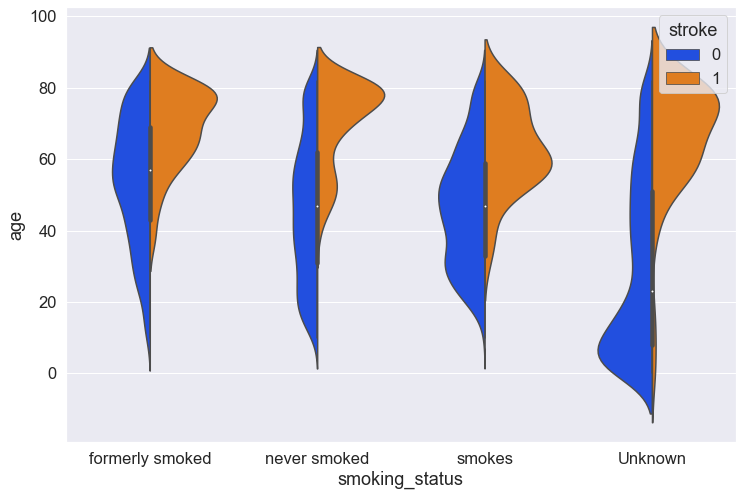

In [38]:
plt.figure(figsize = [12,8])
sns.violinplot(data = df, y = df.age.astype('float'), x = "smoking_status", hue = "stroke",
             dodge = True, split = True)

### As is visible in the Figure above, people with age of more than 40 are much more in risk of stroke.
### It is also shown that people who smoke would be at higher risk of stroke before they reach 60. While the other types of smoking groups (formerly smoked/never smoked) are in the highest risk when they are older than 60.

In [39]:
age_bins = [0,10,18,35,55,100]
age_labels = ["Child[0-9]","Teenager[10-18]","Young[19-35]","Middle_aged[36-55]","Old[56-82]"]

In [40]:
age_categories = pd.cut(df.age, age_bins, labels = age_labels, right = False)

In [41]:
df["age_range"] = age_categories

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


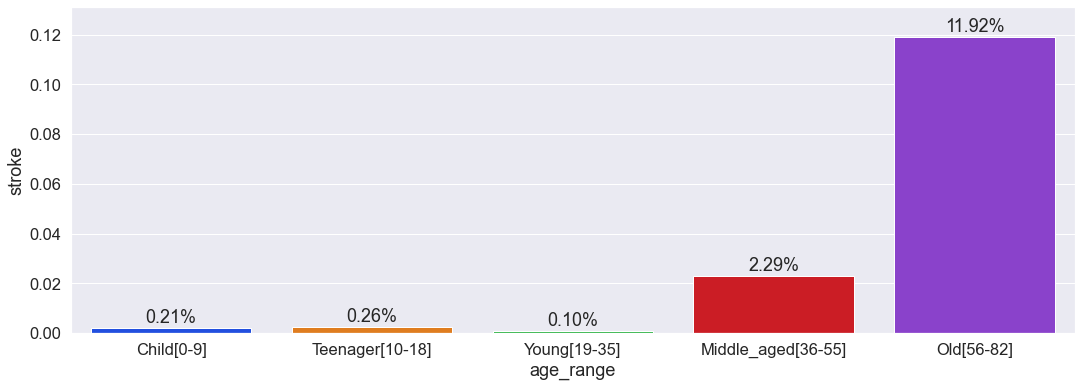

In [42]:
S1 = df.groupby("age_range").stroke.sum()/df.groupby("age_range").stroke.count()
bar_plot_rel(S1)

### As is observable in the above figure, the rate of stroke among people under 35 is less than 1%. This rate for middle aged people is 2.3% while the highest risk of stroke is related to people over 56 who face stroke with probability of 12%.

# Work and Residence type

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


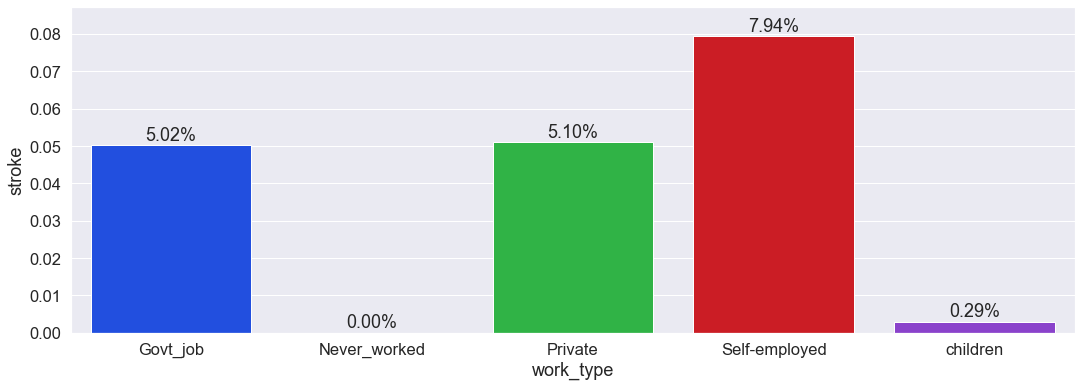

In [43]:
S1 = df.groupby("work_type").stroke.sum()/df.groupby("work_type").stroke.count()
bar_plot_rel(S1)

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='age'>

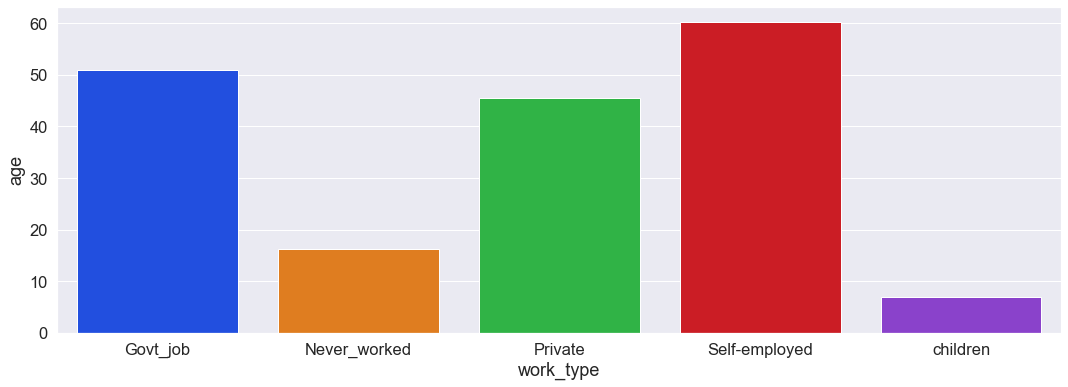

In [44]:
S1 = df.groupby("work_type").age.mean()
plt.figure(figsize = [18,6])
sns.barplot(S1.index, S1)

### As is shown in the above two figures, Although self-employed people have higher risk of stroke (8%), compared to other types of jobs(5%), the the average age of the people who are self-employed is 10-15 years more than other groups of people with different work type. Therefore, it can be concluded that the higher risk of self-employed in getting stroke is related to their average age of these people.

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


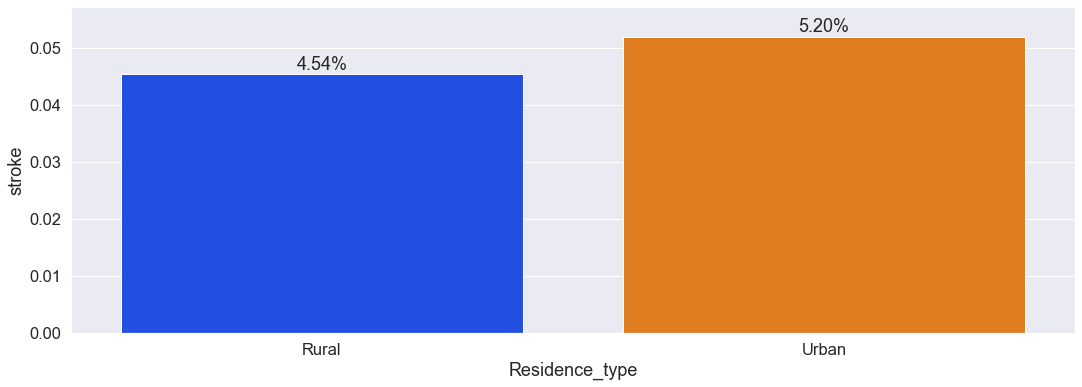

In [45]:
S1 = df.groupby("Residence_type").stroke.sum()/df.groupby("Residence_type").stroke.count()
bar_plot_rel(S1)

<AxesSubplot:xlabel='Residence_type', ylabel='age'>

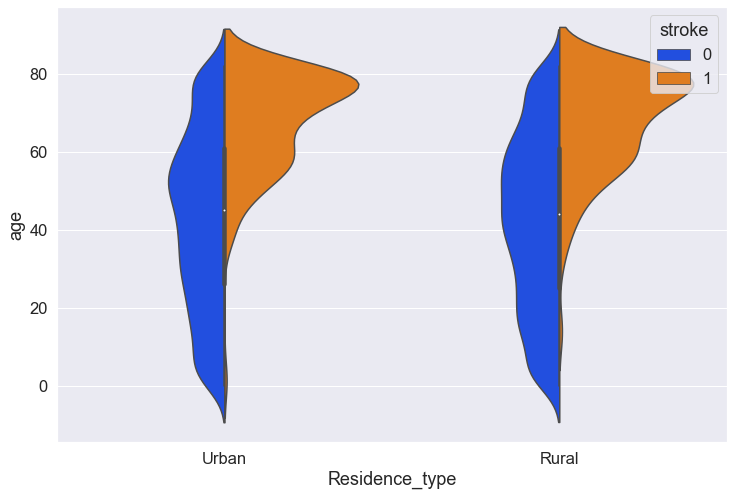

In [46]:
plt.figure(figsize = [12,8])
sns.violinplot(data = df, y = df.age.astype('float'), x = "Residence_type", hue = "stroke",
             dodge = True, split = True)

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='age'>

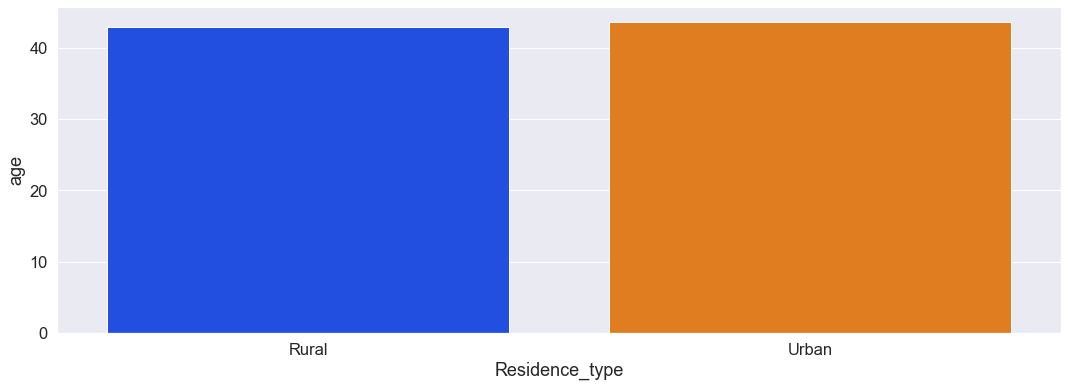

In [47]:
S1 = df.groupby("Residence_type").age.mean()
plt.figure(figsize = [18,6])
sns.barplot(S1.index, S1)

### It can be seen in the above three figures that the average age and the age distribution among the people living in rural and urban areas are the same. While the stroke rate in these areas are 4.5% and 5.2%, respectively. This influence cannot be ignored and thus this feature will be analyzed in the machine learning algorithm.

# Heart Disease, Hypertension and BMI

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


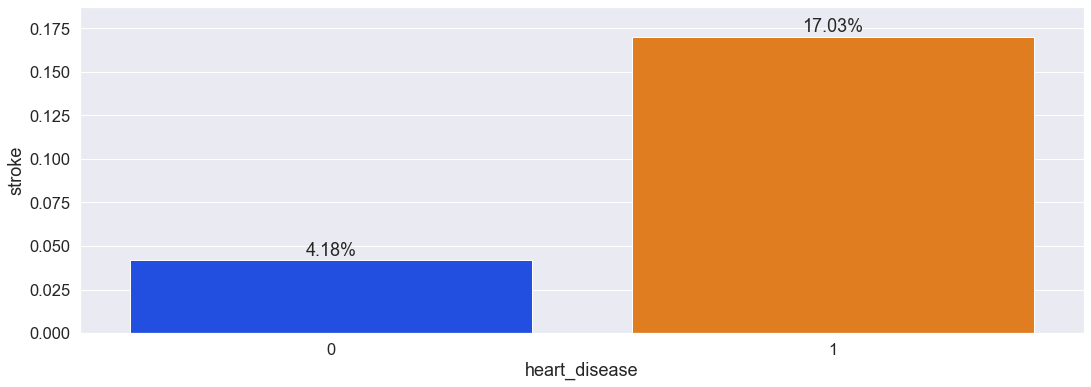

In [48]:
S1 = df.groupby("heart_disease").stroke.sum()/df.groupby("heart_disease").stroke.count()
bar_plot_rel(S1)

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='age'>

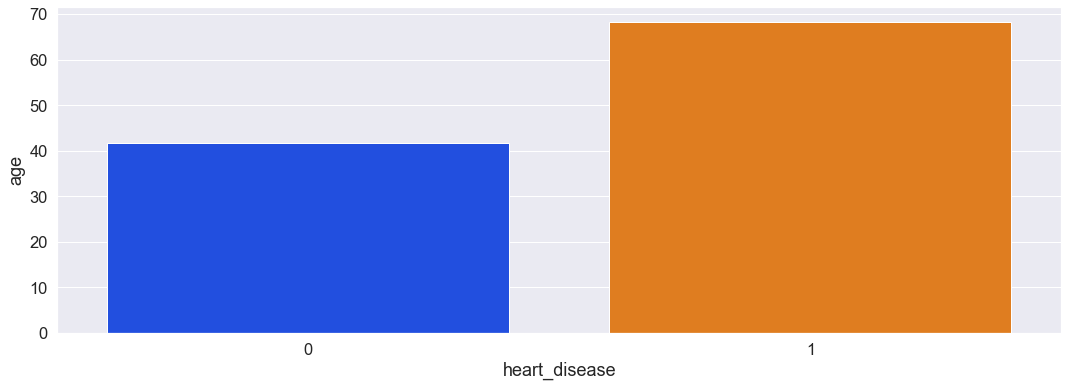

In [49]:
S1 = df.groupby("heart_disease").age.mean()
plt.figure(figsize = [18,6])
sns.barplot(S1.index, S1)

### As is shown above, the average age of the people who have heart disease is nearly 30 years higher than those without any heart disease. This fact causes the huge difference between the stroke rate of the people who has (17%) and does not have any heart disease(4%). However, this feature will also be included in the final machine learning algorithm.

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


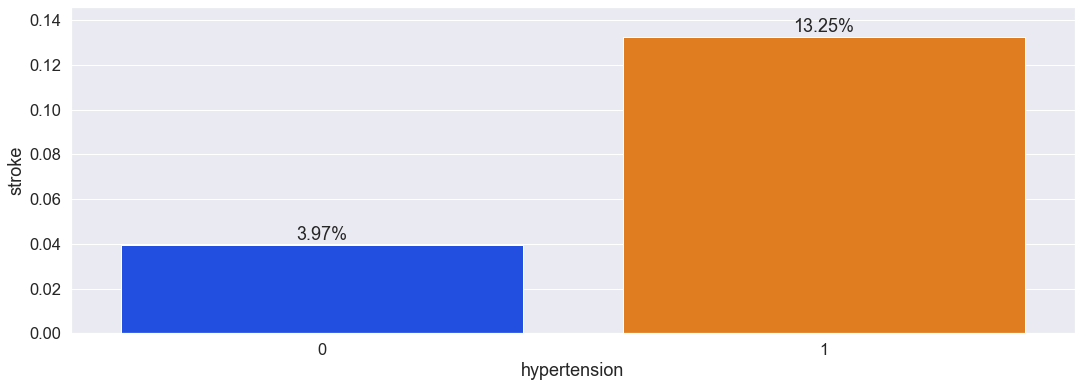

In [50]:
S1 = df.groupby("hypertension").stroke.sum()/df.groupby("hypertension").stroke.count()
bar_plot_rel(S1)

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='age'>

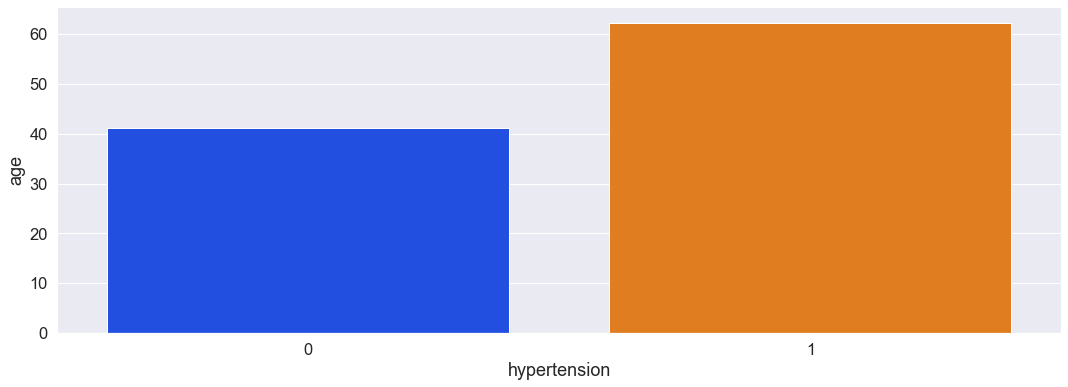

In [51]:
S1 = df.groupby("hypertension").age.mean()
plt.figure(figsize = [18,6])
sns.barplot(S1.index, S1)

### The same thing is right for the hypertension.

In [52]:
bmi_bins = [0,17,30,43,100]
bmi_labels = ["low[0-17]","medium[18-30]","high[31-43]","extremely high[44-100]"]
df["bmi_range"] = pd.cut(df.bmi,bmi_bins, labels = bmi_labels, right = False)

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


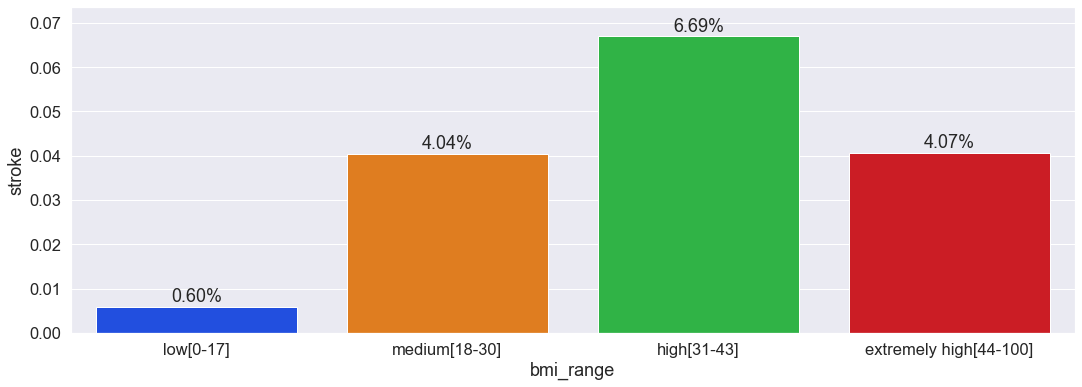

In [53]:
S1 = df.groupby("bmi_range").stroke.sum()/df.groupby("bmi_range").stroke.count()
bar_plot_rel(S1)

<AxesSubplot:xlabel='bmi_range', ylabel='count'>

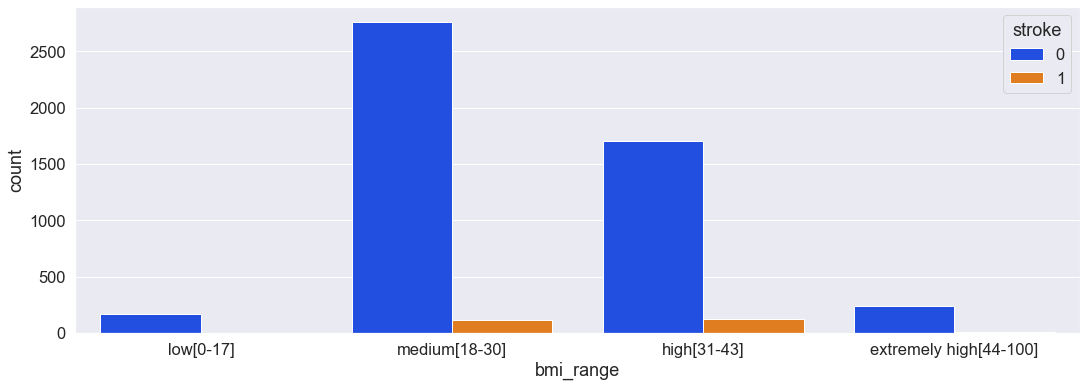

In [54]:
plt.figure(figsize = [18,6])
sns.countplot(data = df, x = 'bmi_range', hue = 'stroke')

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi_range', ylabel='age'>

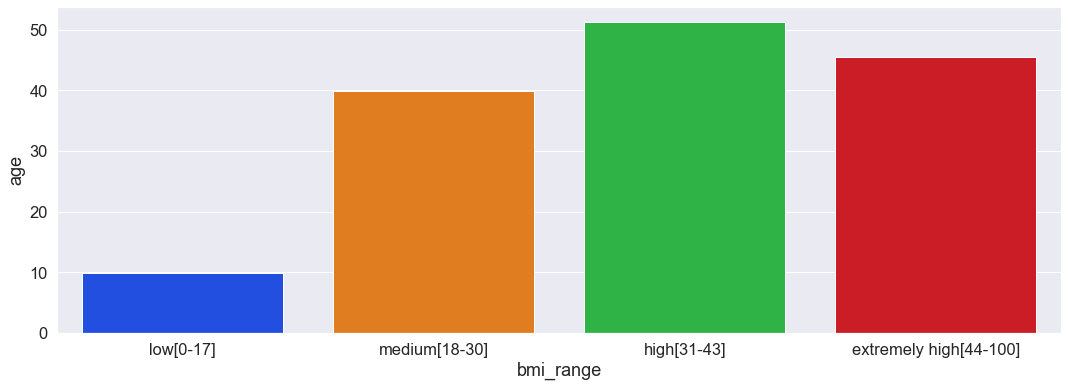

In [55]:
S1 = df.groupby("bmi_range").age.mean()
plt.figure(figsize = [18,6])
sns.barplot(S1.index, S1)

In [56]:
#sns.lmplot(data = df, y = "age", x = "bmi", height = 8, aspect = 1, col = "stroke")

### As is shown in the four figures above, 7% of the people with bmi between 31 and 43 had stroke. This value for the people with extreme bmi (more than 44) and the people with medium level of bmi (between 18 and 30) is 4%. On the other side, the chunk of extreme bmi is much smaller than other chunks. Therefore, the information extracted from this chunk can be ignored and only the people with bmi level of medium and high are compared. 
### Similar to hypertension and heart disease, this feature has positive correlation with age. since the mean age of the group with high bmi is more than 10 years higher than the people with medium bmi. 
### Another point is related to the linear regression plot between age and bmi of the people who has stroke. this correlation is negative. while it was shown that the correlation between age and stroke is positive. Therefore, it is believed that the positive influence of bmi on stroke is not associated with age and this feature influence the stroke risk solely.

In [57]:
df.avg_glucose_level.describe([0,0.05,0.5,0.95,1])

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
0%         55.120000
5%         60.712000
50%        91.880000
95%       216.304000
100%      271.740000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [58]:
glu_bins = [0,60,92,216,272]
glu_labels = ["low[55-60]","medium[61-92]","high[93-216]","extremely high[217-272]"]
df["glucose_range"] = pd.cut(df.avg_glucose_level,glu_bins, labels = glu_labels, right = False)

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


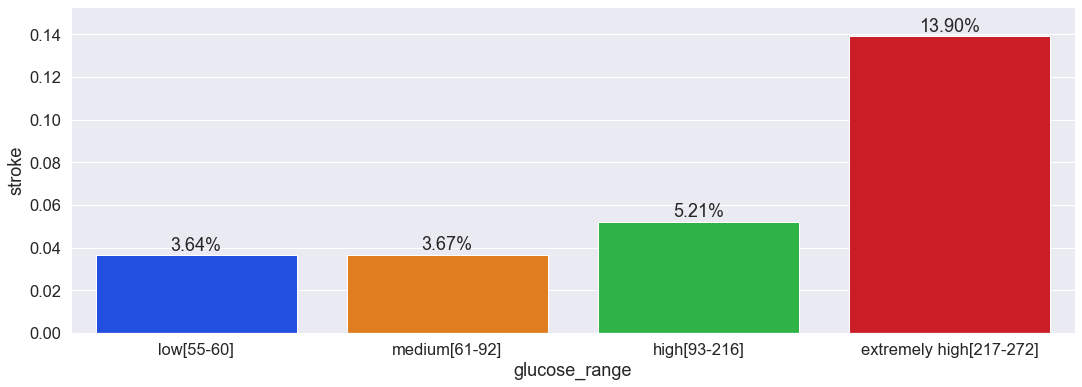

In [59]:
S1 = df.groupby("glucose_range").stroke.sum()/df.groupby("glucose_range").stroke.count()
bar_plot_rel(S1)

<AxesSubplot:xlabel='glucose_range', ylabel='count'>

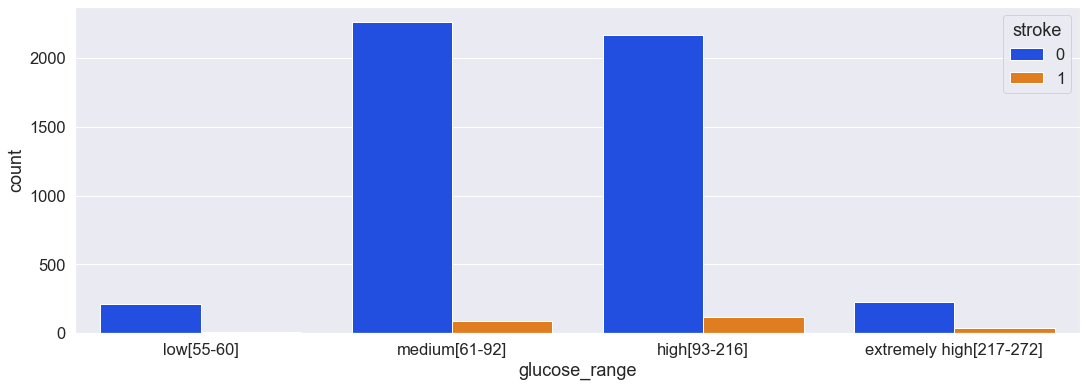

In [60]:
plt.figure(figsize = [18,6])
sns.countplot(data = df, x = 'glucose_range', hue = 'stroke')

C:\Users\Saeid\miniconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='glucose_range', ylabel='age'>

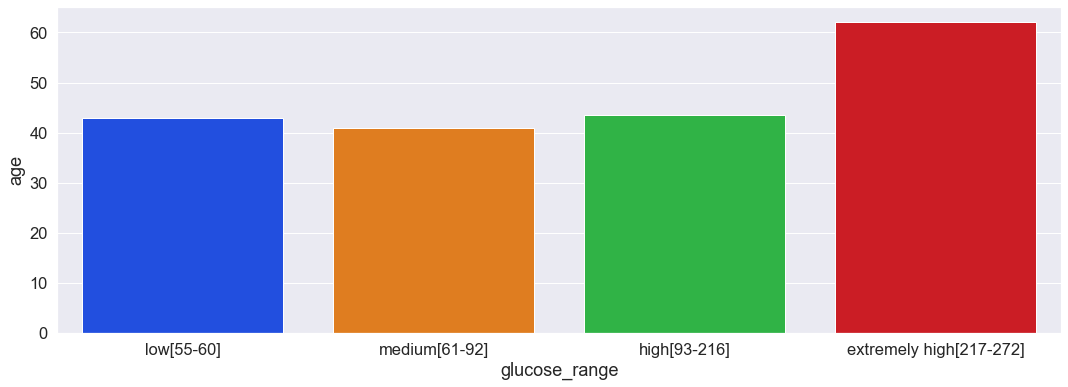

In [61]:
S1 = df.groupby("glucose_range").age.mean()
plt.figure(figsize = [18,6])
sns.barplot(S1.index, S1)

In [62]:
#sns.lmplot(data = df, y = "age", x = "avg_glucose_level", height = 8, aspect = 1, col = "stroke")

### The average glucose has significant influence on the stroke. people with extremely high glucose average are at risk of more than 13% stroke. Although the average age of this group is more than 60, the influence of glutose on stroke is independant from the age since the correlation between age and average glutose for the people who had stroke is nearly zero.

# According to the data analyzation above, We conclude that the following features can have significant influence on the risk of stroke:
# 1) Age
# 2) BMI
# 3) Average Glutose level

# Other probable influential features are:
# 4) Marital Status
# 5) Smoking status
# 6) Heart disease
# 7) Hypertension
# 8) Residence type

# It is believed that gender and work type has no influence on the stroke risk.

## According to the output results of the analyzation of this dataset, gender and work type are ommited from the dataset. two different machine learning approaches are subsequently applied on the 8 influential features. In the first approach only the top three effective features are considered as the input data into the model. In the following model, the other 5 less effective features are also added. The model with highest accuracy is chosen as the predictor.

# Machine Learning Model

## Preparing the input data

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [64]:
columns1 = ['age', 'bmi', 'avg_glucose_level', 'ever_married', 'smoking_status',
           'heart_disease', 'hypertension','Residence_type']
df_X = df[columns1]
df_X_temp = pd.get_dummies(df_X,columns = ["ever_married","Residence_type","smoking_status"], drop_first = True)

In [65]:
X = df_X_temp.values
y = df.loc[:,'stroke'].values

# Train-Test-Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, shuffle = True, random_state = 123,
                                                    test_size = 0.2)

NameError: name 'df_y' is not defined

In [ ]:
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")
y_train = y_train.astype("int64")
y_test = y_test.astype("int64")

In [ ]:
print("The shape of X_train is {}".format(X_train.shape))
print("The shape of y_train is {}".format(y_train.shape))
print("The shape of X_test is {}".format(X_test.shape))
print("The shape of y_test is {}".format(y_test.shape))
print("The number of stroke reports in y_train is {}".format(y_train.sum()))
print("The number of stroke reports in y_test is {}".format(y_test.sum()))

# Scaling the X_train and X_test

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train_sc, y_train)
y_pred_lr = classifier_lr.predict(X_test_sc)
print("The accurcay of logistic regression was {0:.0%}".format(accuracy_score(y_test, y_pred_lr)))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, vmin=0, vmax = 100,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')

# Logistic Regression + Threshhold modification

In [ ]:
y_pred_lr_0 = classifier_lr.predict_proba(X_test_sc)[:,1][np.where(y_test == 0)]
y_pred_lr_1 = classifier_lr.predict_proba(X_test_sc)[:,1][np.where(y_test == 1)]

fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = [16,6],sharey = True)
ax1.plot(y_pred_lr_0)
ax1.plot([0,1000],[0.5,0.5])
ax1.set_ylabel("Propabilities of being in class 1")
ax1.set_xlabel("True Values in Class 0")


ax2.plot(y_pred_lr_1)
ax2.set_xlabel("True Values in Class 1")
ax2.plot([0,50],[0.5,0.5])

## The best Threshold here is 0.36, so that the prediction in class 0 does not change

In [ ]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train_sc, y_train)
y_pred_lr = ((classifier_lr.predict_proba(X_test_sc)[:,1] > 0.36).astype(bool))
print("The accurcay of logistic regression was {0:.0%}".format(accuracy_score(y_test, y_pred_lr)))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, vmin=0, vmax = 100,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(max_depth=10)
classifier_dt.fit(X_train_sc, y_train)
y_pred_dt = classifier_dt.predict(X_test_sc)
print("The accurcay of Decision Tree was {0:.0%}".format(accuracy_score(y_test, y_pred_dt_3)))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, vmin=0, vmax = 100,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')

# Decision Tree + Threshhold modification

In [ ]:
y_pred_dt_0 = classifier_dt.predict_proba(X_test_sc)[:,1][np.where(y_test == 0)]
y_pred_dt_1 = classifier_dt.predict_proba(X_test_sc)[:,1][np.where(y_test == 1)]

fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = [16,6],sharey = True)
ax1.plot(y_pred_dt_0)
ax1.plot([0,1000],[0.5,0.5])
ax1.set_ylabel("Propabilities of being in class 1")
ax1.set_xlabel("True Values in Class 0")


ax2.plot(y_pred_dt_1)
ax2.set_xlabel("True Values in Class 1")
ax2.plot([0,50],[0.5,0.5])

## It is impossible to change the Thrshhold here, since changing it leads to alot of misclassifications in class 0

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=1000,max_depth = 10,min_samples_split=5)
classifier_rf.fit(X_train_sc, y_train)
y_pred_rf = classifier_rf.predict(X_test_sc)
print("The accurcay of Decision Tree was {0:.0%}".format(accuracy_score(y_test, y_pred_rf)))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, vmin=0, vmax = 100,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')

# Random Forest + Threshhold modification

In [ ]:
y_pred_rf_0 = classifier_rf.predict_proba(X_test_sc)[:,1][np.where(y_test == 0)]
y_pred_rf_1 = classifier_rf.predict_proba(X_test_sc)[:,1][np.where(y_test == 1)]

fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = [16,6],sharey = True)
ax1.plot(y_pred_rf_0)
ax1.plot([0,1000],[0.5,0.5])
ax1.set_ylabel("Propabilities of being in class 1")
ax1.set_xlabel("True Values in Class 0")


ax2.plot(y_pred_rf_1)
ax2.set_xlabel("True Values in Class 1")
ax2.plot([0,50],[0.5,0.5])

## It is impossible to change the Thrshhold here, since changing it leads to alot of misclassifications in class 0

# SVC

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC(degree = 3, gamma = 0.5, C = 1,kernel = 'rbf')
classifier_svc.fit(X_train_sc, y_train)
y_pred_svc = classifier_svc.predict(X_test_sc)
print("The accurcay of Decision Tree was {0:.0%}".format(accuracy_score(y_test, y_pred_svc)))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, vmin=0, vmax = 100,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')

In [ ]:
Significance_Series = pd.Series(data = model_RF.feature_importances_, index = df_X_temp.columns).sort_values()

In [ ]:
plt.figure(figsize = [18,6])
plt.barh(Significance_Series.index, Significance_Series)

# As is shown in the figure above, the prediction of us before entering the data into machine learning methods was correct.